In [2]:
!pip install GEOparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29064 sha256=458d7554cbdbb5ca344a8eadea05b88832ee56b7d367e6b381fe3ea95f6ce1bf
  Stored in directory: /root/.cache/pip/wheels/b4/27/3b/3faf8423d9c4fad02d693b4d75d1b6e82fde1d5cf59cc9a40e
Successfully built GEOparse


# Download e tratamento dos dados

In [3]:
import GEOparse #Download dos dados do NCBI/GEO
import pandas as pd #Tratamento dos dados
import seaborn as sns #Gráficos
from matplotlib import pyplot as plt #Gráficos
from sklearn.metrics import accuracy_score #Cálculo da acurácia
from sklearn.ensemble import RandomForestClassifier #Modelo utilizado
from sklearn.model_selection import train_test_split #Partição do dataset
from sklearn.feature_selection import SelectKBest, chi2 #Seleção de features
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Construção da matriz confusão

In [4]:
gse = GEOparse.get_GEO(geo="GSE53229", destdir="./")

17-Mar-2023 21:12:49 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
17-Mar-2023 21:12:49 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE53nnn/GSE53229/soft/GSE53229_family.soft.gz to ./GSE53229_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE53nnn/GSE53229/soft/GSE53229_family.soft.gz to ./GSE53229_family.soft.gz
100%|██████████| 51.6M/51.6M [00:00<00:00, 107MB/s]
17-Mar-2023 21:12:49 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
17-Mar-2023 21:12:49 DEBUG downloader - Moving /tmp/tmp9jdc_x2f to /content/GSE53229_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmp9jdc_x2f to /content/GSE53229_family.soft.gz
17-Mar-2023 21:12:50 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE53nnn/GSE53229/soft/GSE53229_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE53nnn/GSE532

In [5]:
gse.get_type()

'Methylation profiling by array'

In [6]:
phenodata = gse.phenotype_data
phenodata

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,series_id,data_row_count,characteristics_ch1.0.ethnicity,characteristics_ch1.3.patient age,characteristics_ch1.4.patient gender,characteristics_ch1.5.disease state,description,characteristics_ch1.3.patient gender,characteristics_ch1.4.disease state,treatment_protocol_ch1
GSM1257481,Glioblastoma gbm-0011,GSM1257481,Public on Nov 07 2013,Nov 01 2013,Dec 11 2013,RNA,1,Human glioblastoma,Homo sapiens,9606,...,"GSE52009,GSE53228,GSE53229",41091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1257483,Glioblastoma gbm-0126,GSM1257483,Public on Nov 07 2013,Nov 01 2013,Dec 11 2013,RNA,1,Human glioblastoma,Homo sapiens,9606,...,"GSE52009,GSE53228,GSE53229",41091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1257484,Glioblastoma gbm-0156,GSM1257484,Public on Nov 07 2013,Nov 01 2013,Dec 11 2013,RNA,1,Human glioblastoma,Homo sapiens,9606,...,"GSE52009,GSE53228,GSE53229",41091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1257485,Glioblastoma gbm-0168,GSM1257485,Public on Nov 07 2013,Nov 01 2013,Dec 11 2013,RNA,1,Human glioblastoma,Homo sapiens,9606,...,"GSE52009,GSE53228,GSE53229",41091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1257486,Glioblastoma gbm-0178,GSM1257486,Public on Nov 07 2013,Nov 01 2013,Dec 11 2013,RNA,1,Human glioblastoma,Homo sapiens,9606,...,"GSE52009,GSE53228,GSE53229",41091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1288113,Glioblastoma gbm-0182,GSM1288113,Public on Dec 12 2013,Dec 11 2013,Dec 12 2013,genomic,1,Human glioblastoma,Homo sapiens,9606,...,"GSE53228,GSE53229",27578,Chinese population,NaN,NaN,NaN,gbm-0182,2,Glioblastoma,No treatment was applied to the biological mat...
GSM1288114,Glioblastoma gbm-0214,GSM1288114,Public on Dec 12 2013,Dec 11 2013,Dec 12 2013,genomic,1,Human glioblastoma,Homo sapiens,9606,...,"GSE53228,GSE53229",27578,Chinese population,NaN,NaN,NaN,gbm-0214,2,Glioblastoma,No treatment was applied to the biological mat...
GSM1288115,Glioblastoma gbm-0305,GSM1288115,Public on Dec 12 2013,Dec 11 2013,Dec 12 2013,genomic,1,Human glioblastoma,Homo sapiens,9606,...,"GSE53228,GSE53229",27578,Chinese population,NaN,NaN,NaN,gbm-0305,2,Glioblastoma,No treatment was applied to the biological mat...
GSM1288116,Glioblastoma gbm-0409,GSM1288116,Public on Dec 12 2013,Dec 11 2013,Dec 12 2013,genomic,1,Human glioblastoma,Homo sapiens,9606,...,"GSE53228,GSE53229",27578,Chinese population,NaN,NaN,NaN,gbm-0409,1,Glioblastoma,No treatment was applied to the biological mat...


In [7]:
phenodata["type"].value_counts()

genomic    125
RNA         20
Name: type, dtype: int64

In [8]:
DNAmeth_phenodata = phenodata[phenodata['type']=='genomic']
DNAmeth_phenodata["type"].value_counts()

genomic    125
Name: type, dtype: int64

In [9]:
DNAmeth_phenodata["source_name_ch1"].value_counts()

Human astrocytoma                     43
Human glioblastoma                    37
Human anaplastic oligodendrocytoma    15
Human oligodendroglioma               12
Human anaplastic oligodendroglioma    10
Human anaplastic astrocytoma           8
Name: source_name_ch1, dtype: int64

In [10]:
DNAmeth_phenodata["data_row_count"].value_counts()

27578    125
Name: data_row_count, dtype: int64

In [11]:
astrocitoma = list(DNAmeth_phenodata.index[DNAmeth_phenodata["source_name_ch1"] == "Human astrocytoma"])
glioblastoma = list(DNAmeth_phenodata.index[DNAmeth_phenodata["source_name_ch1"] == "Human glioblastoma"])
samples = astrocitoma + glioblastoma
type(samples)

list

## Função para formação da matriz do nível de metilação (beta-values)

In [12]:
def formar_dataframe(lista_de_amostras):

  df = pd.DataFrame(gse.gsms[lista_de_amostras[0]].table[["ID_REF","VALUE"]]) #acessa o nível de metilação da amostra em questão
  df.rename(columns={"VALUE":lista_de_amostras[0]}, inplace = True) #renomeia coluna "VALUE" para o nome da amostra
  df = df.set_index("ID_REF")  #transforma a coluna "ID_REF" em rownames
  df = df.T #transposta

  for i in range(1,len(lista_de_amostras)):
    df2 = pd.DataFrame(gse.gsms[lista_de_amostras[i]].table[["ID_REF","VALUE"]])
    df2.rename(columns={"VALUE":lista_de_amostras[i]}, inplace = True)
    df2 = df2.set_index("ID_REF")
    df2 = df2.T 
    if list(df.columns) == list(df2.columns): #confere se a ordem das probes é a mesma 
      df = pd.concat([df, df2]) #concatena iterativamente os dataframes
    else:
      df2 = df2[df.columns] #ordena caso não seja
      df = pd.concat([df, df2])  
  
  return df

DNA methylation beta values are continuous variables between 0 and 1, representing the ratio of the intensity of the methylated bead type to the combined locus intensity

In [13]:
methylation_matrix = formar_dataframe(samples)
methylation_matrix

ID_REF,cg07259382,cg17271365,cg07847428,cg17470637,cg25084220,cg25842356,cg00720072,cg18409845,cg08103676,cg20126158,...,cg14804557,cg15051063,cg15121304,cg16878021,cg19195724,cg22262964,cg23663653,cg23984130,cg23988567,cg27348440
GSM1287993,0.379213,0.557644,0.470046,0.519540,0.298932,0.487315,0.842533,0.327381,0.302405,0.369281,...,0.393605,0.443548,0.236364,0.362179,0.387755,0.514009,0.330645,0.360140,0.298742,0.173077
GSM1287994,0.514338,0.445652,0.106399,0.569083,0.101444,0.092052,0.936418,0.027179,0.017209,0.570765,...,0.623656,0.039428,0.698228,0.105454,0.210576,0.100375,0.232792,0.037098,0.051504,0.032756
GSM1287995,0.443698,0.499358,0.367383,0.401274,0.305556,0.708901,0.853563,0.333333,0.292776,0.352160,...,0.393357,0.477807,0.263566,0.311111,0.460674,0.420436,0.208451,0.263780,0.270833,0.179487
GSM1287996,0.638594,0.625522,0.063625,0.468368,0.082982,0.119141,0.951291,0.028531,0.018003,0.588562,...,0.683191,0.027456,0.708422,0.099377,0.191112,0.058028,0.262016,0.032195,0.041757,0.029501
GSM1287997,0.710799,0.753757,0.082466,0.470975,0.090389,0.105198,0.944463,0.034727,0.017717,0.563380,...,0.617031,0.040560,0.637740,0.100067,0.189701,0.108563,0.165352,0.038235,0.040402,0.026999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1288113,0.931620,0.566940,0.000840,0.055890,0.003940,0.596510,0.024010,0.009610,0.027460,0.001940,...,0.876780,0.954780,0.865480,0.951630,0.845120,0.462800,0.759770,0.847590,0.743630,0.650700
GSM1288114,0.885800,0.778930,0.000130,0.086730,0.005170,0.864570,0.021810,0.002130,0.036540,0.013850,...,0.733830,0.562260,0.876510,0.824320,0.517640,0.087410,0.607120,0.532290,0.654530,0.580940
GSM1288115,0.877280,0.618220,0.000000,0.054250,0.002590,0.717770,0.020380,0.000110,0.027950,0.003690,...,0.866170,0.909870,0.874720,0.939800,0.835910,0.341690,0.790660,0.803100,0.801050,0.675940
GSM1288116,0.807990,0.429600,0.001560,0.054190,0.003150,0.681170,0.020920,0.000000,0.026900,0.000580,...,0.873970,0.924690,0.846720,0.931440,0.590290,0.382840,0.712200,0.650990,0.695270,0.613210


In [14]:
methylation_matrix.index == samples #True

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [15]:
# 1: Astrocitoma
# 2: Glioblastoma

label = list((["1"] * 43) + ["2"] * 37)
len(label)

80

In [16]:
methylation_matrix["label"] = label
methylation_matrix

ID_REF,cg07259382,cg17271365,cg07847428,cg17470637,cg25084220,cg25842356,cg00720072,cg18409845,cg08103676,cg20126158,...,cg15051063,cg15121304,cg16878021,cg19195724,cg22262964,cg23663653,cg23984130,cg23988567,cg27348440,label
GSM1287993,0.379213,0.557644,0.470046,0.519540,0.298932,0.487315,0.842533,0.327381,0.302405,0.369281,...,0.443548,0.236364,0.362179,0.387755,0.514009,0.330645,0.360140,0.298742,0.173077,1
GSM1287994,0.514338,0.445652,0.106399,0.569083,0.101444,0.092052,0.936418,0.027179,0.017209,0.570765,...,0.039428,0.698228,0.105454,0.210576,0.100375,0.232792,0.037098,0.051504,0.032756,1
GSM1287995,0.443698,0.499358,0.367383,0.401274,0.305556,0.708901,0.853563,0.333333,0.292776,0.352160,...,0.477807,0.263566,0.311111,0.460674,0.420436,0.208451,0.263780,0.270833,0.179487,1
GSM1287996,0.638594,0.625522,0.063625,0.468368,0.082982,0.119141,0.951291,0.028531,0.018003,0.588562,...,0.027456,0.708422,0.099377,0.191112,0.058028,0.262016,0.032195,0.041757,0.029501,1
GSM1287997,0.710799,0.753757,0.082466,0.470975,0.090389,0.105198,0.944463,0.034727,0.017717,0.563380,...,0.040560,0.637740,0.100067,0.189701,0.108563,0.165352,0.038235,0.040402,0.026999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1288113,0.931620,0.566940,0.000840,0.055890,0.003940,0.596510,0.024010,0.009610,0.027460,0.001940,...,0.954780,0.865480,0.951630,0.845120,0.462800,0.759770,0.847590,0.743630,0.650700,2
GSM1288114,0.885800,0.778930,0.000130,0.086730,0.005170,0.864570,0.021810,0.002130,0.036540,0.013850,...,0.562260,0.876510,0.824320,0.517640,0.087410,0.607120,0.532290,0.654530,0.580940,2
GSM1288115,0.877280,0.618220,0.000000,0.054250,0.002590,0.717770,0.020380,0.000110,0.027950,0.003690,...,0.909870,0.874720,0.939800,0.835910,0.341690,0.790660,0.803100,0.801050,0.675940,2
GSM1288116,0.807990,0.429600,0.001560,0.054190,0.003150,0.681170,0.020920,0.000000,0.026900,0.000580,...,0.924690,0.846720,0.931440,0.590290,0.382840,0.712200,0.650990,0.695270,0.613210,2


<Axes: xlabel='label', ylabel='count'>

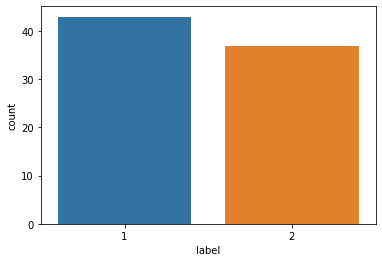

In [17]:
sns.countplot(x=methylation_matrix["label"])

## Missing values

In [18]:
methylation_matrix.shape #Dimensão da matriz de metilação de DNA

(80, 27579)

In [19]:
methylation_matrix.isna().sum(axis = 0).max() #Maior valor de NAs em uma coluna

9

In [20]:
methylation_matrix.isna().sum(axis = 1).max() #Maior valor de NAs em uma linha

31

In [21]:
methylation_matrix.isna().sum().sum() #Valor total de NAs no dataframe

346

In [22]:
methylation_matrix = methylation_matrix.dropna(axis = "columns") #Remove colunas com NAs
methylation_matrix.shape #Nova dimensão da matriz de metilação de DNA: 27.275 probes

(80, 27275)

## Feature selection
Para diminuir o número de 27.275 probes para o treinamento do modelo, foi feita uma seleção de features baseada em filtro utilizando o teste qui-quadrado

In [23]:
#Separando as features da label
X = methylation_matrix.iloc[:, :-1]
y = methylation_matrix.iloc[:, -1]

In [24]:
#Seleção de features baseada em filtro
selector = SelectKBest(chi2, k=1000) #Seleciona as 1000 melhores features usando o teste qui-quadrado
X_new = selector.fit_transform(X, y)

#Obtendo as colunas selecionadas
mask = selector.get_support() #boolean array com as colunas selecionadas
new_features = X.columns[mask] #array com os nomes das colunas selecionadas

#Criando o novo dataframe apenas com as colunas selecionadas e o rótulo
filtered_methylation_matrix = methylation_matrix[list(new_features)]
filtered_methylation_matrix["label"] = label

<ipython-input-24-3cf38d6467a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_methylation_matrix["label"] = label


In [25]:
filtered_methylation_matrix

ID_REF,cg13477510,cg12224394,cg23547073,cg00168082,cg12256080,cg03860051,cg14971781,cg15863254,cg15286905,cg01130192,...,cg08395706,cg01930621,cg13636404,cg07125009,cg10040059,cg16124821,cg01913908,cg24762437,cg08709385,label
GSM1287993,0.323232,0.805438,0.687767,0.482289,0.490765,0.433468,0.507279,0.487893,0.494624,0.471143,...,0.427873,0.475852,0.498645,0.378196,0.281356,0.404255,0.072000,0.436100,0.329377,1
GSM1287994,0.026755,0.059729,0.158859,0.058981,0.124324,0.301729,0.069434,0.084040,0.126740,0.299857,...,0.137255,0.220158,0.061897,0.077333,0.070815,0.139774,0.028798,0.164280,0.039787,1
GSM1287995,0.104000,0.759641,0.789749,0.441718,0.412718,0.423932,0.530895,0.809185,0.381166,0.421603,...,0.463950,0.411602,0.440130,0.380952,0.293651,0.439094,0.071565,0.430536,0.333333,1
GSM1287996,0.024911,0.056256,0.152321,0.062179,0.136482,0.460010,0.061700,0.073137,0.139489,0.232408,...,0.139472,0.225557,0.233824,0.046652,0.283526,0.153409,0.029595,0.167073,0.043073,1
GSM1287997,0.026582,0.063181,0.184034,0.090941,0.156469,0.350017,0.062179,0.076475,0.173497,0.397493,...,0.168005,0.411684,0.075308,0.075955,0.423370,0.154219,0.025863,0.193685,0.037659,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1288113,0.931080,0.022740,0.106140,0.003460,0.026520,0.000000,0.003440,0.056570,0.013390,0.009780,...,0.006200,0.004870,0.005580,0.003650,0.028640,0.020220,0.694470,0.013980,0.969350,2
GSM1288114,0.937390,0.013340,0.120030,0.006800,0.016850,0.000000,0.005960,0.080980,0.023110,0.007330,...,0.000490,0.024730,0.020170,0.007580,0.017560,0.029160,0.755690,0.016970,0.971730,2
GSM1288115,0.952360,0.008390,0.085110,0.000400,0.026760,0.000000,0.005740,0.048010,0.004000,0.010010,...,0.001330,0.007920,0.002990,0.000050,0.013090,0.017450,0.792500,0.006440,0.971590,2
GSM1288116,0.957230,0.015620,0.100310,0.007440,0.019430,0.000000,0.006570,0.053020,0.001990,0.008850,...,0.004850,0.003490,0.004590,0.003340,0.016730,0.007020,0.805270,0.007400,0.979680,2


## Construção do modelo 

### Partição dos dados

In [26]:
SEED = 42

X = filtered_methylation_matrix.drop(columns=["label"])
y = filtered_methylation_matrix.label

#25% para teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = SEED)

print(f"Treinamento: {len(Xtrain)} e Teste: {len(Xtest)}")

Treinamento: 60 e Teste: 20


In [27]:
Xtrain.shape

(60, 1000)

In [28]:
ytrain.shape

(60,)

In [29]:
Xtest.shape

(20, 1000)

In [30]:
ytest.shape

(20,)

### Treinamento e teste

In [31]:
#Treino e teste com os parâmetros padrões
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
acc = accuracy_score(ytest, model.predict(Xtest))
acc

0.9

A acurácia foi de 90%

### Matriz confusão

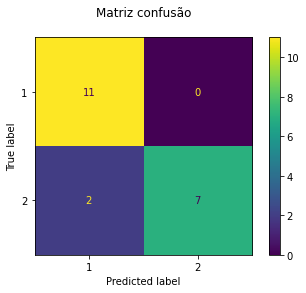

In [32]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest, model.predict(Xtest)), display_labels=model.classes_).plot()
plt.title("Matriz confusão\n ")
plt.show()